In [2]:
import pandas as pd
from konlpy.tag import Okt
import os
import glob
import re 

okt = Okt()
current_dir = os.getcwd()

file_path = '../../data/crawling/cafelist/cafelist_연남동.csv'
data = pd.read_csv(file_path)
print(data)
stopwords = data['name'].tolist()
split_stopwords = []

for word in stopwords:
    split_stopwords.extend(word.split())
    
print(current_dir)
input_directory = os.path.join('../../data', 'crawling', 'blog_review', 'blog_review_result_list', '연남동')
output_directory = os.path.join('../../data', 'RE_konlpy', 'blog_reviews', 'yeonnam')
filepaths = glob.glob(input_directory + '/*.csv')

for filepath in filepaths:
    try:
        data = pd.read_csv(filepath)
    except pd.errors.EmptyDataError:
        print(f'Skipped empty file: {filepath}')
        continue
    
    for stopword in split_stopwords:
        for column in data.columns:
            if column != 'title':
                pattern = re.compile(stopword, re.IGNORECASE)  
                data[column] = data[column].apply(lambda x: pattern.sub('', str(x)))
    
    for column in data.columns:
        data[column] = data[column].apply(lambda x: [okt.normalize(word[0]) for word in okt.pos(' '.join(okt.morphs(x))) if word[1] in ['Noun', 'Adjective']])
        data[column] = data[column].apply(lambda x: [okt.morphs(word, stem=True)[0] if okt.pos(word)[0][1] == 'Adjective' else word for word in x])
    
    base = os.path.basename(filepath)
    new_filepath = os.path.join(output_directory, f'{os.path.splitext(base)[0]}_stopwords.txt')
    data.to_csv(new_filepath, index=False, sep='\t', header=None)

print("All files have been processed.")

     Unnamed: 0        name cafe_type
0             1        로컬코드       브런치
1             2  브레디포스트 연남점    카페,디저트
2             3        팽페르뒤    카페,디저트
3             4       코코로카라      베이커리
4             5         터틀힙    카페,디저트
..          ...         ...       ...
296         299        크리멜트      베이커리
297         300        앤스커피    카페,디저트
298         301     로앤쿡드 연남       브런치
299         302        요거로밀    카페,디저트
300         303        라보아르    카페,디저트

[301 rows x 3 columns]
C:\Users\kim\Desktop\2023-2\빅데이터프로그래밍\cabojago\code\konlpy
All files have been processed.


In [ ]:
import pandas as pd
from konlpy.tag import Okt
import os

# Okt 객체 생성
okt = Okt()
current_dir = os.getcwd()

# 불용어 리스트 생성
stopwords = ['좋다','있다', '같다', '시간', '곳', '것', '로', '수', '맛있다','망원','망원동',
            '층','주문','소설','카페','층','시장','소','아니다','주인공','서울특별시',
            '길','아더','홍대','에러','추천','뭔가','층','길','점','호','경기도','번길','마포구','더',
            '인천광역시','경상남도','스','호점','녀석','밤비','없다','그','대구광역시','영등포구','상가',
            '진짜','이','','거','내','때','저','나','부산광역시','경상도','메','마포','시민','서울','쉬',
            '-','커피','맛','이다','엠','개','이다','안','집','옷','폰','및','또','태형','좋아하다','투썸플레이스',
            '이디야','부동산','한남','한남동','용산구','/','성수동','성수','연희동','연희','연남동','연남',
            '메뉴', '빌딩', '인천', '중구', '귀엽', '친절하다', '향','게','제','밉다','예쁘다','많다','정말'
            ,'하나','가지','곧','사람','사장','방문']

dong_list = ['hannam','seongsu','mangwon','yeonhee','yeonnam']
for dong in dong_list:
    # 파일 경로 설정
    filepath = os.path.join(current_dir, 'data','konlpy', 'visiter_reviews', f'visiter_reviews_knlpy_{dong}.csv')

    # csv 파일 읽기
    data = pd.read_csv(filepath, index_col=0)

    # 형태소 분석 결과를 저장할 DataFrame 생성
    morphs_data = pd.DataFrame(index=data.index, columns=data.columns)

    # 형태소 분석 및 품사 태깅
    for column in data.columns:
        for idx in data.index:
            text = data.loc[idx, column]
            try:
                _ = float(text)  
                morphs_data.loc[idx, column] = text  # 변환 성공하면 그대로 저장
            except ValueError:  # 변환 실패하면 문자열로 처리 data\RE_konlpy\blog_reviews\hannam
                morphs = [word for word, tag in okt.pos(okt.normalize(text), stem=True) if tag in ['Noun', 'Adjective'] and word not in stopwords]
                morphs_data.loc[idx, column] = ' '.join(morphs)

    # 결과 확인
    print(morphs_data.head())
    output_directory = os.path.join(current_dir, 'data', 'RE_konlpy','visiter_reviews',f'{dong}')
    output_filename = os.path.join(output_directory, f'visiter_reviews_knlpy_{dong}.csv')
    
    # 결과를 새로운 csv 파일로 저장
    morphs_data.to_csv(output_filename)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from c

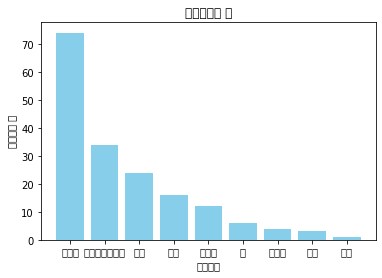

In [1]:
import matplotlib.pyplot as plt

# 주어진 데이터
categories = ['디저트', '인스타그래머블', '공부', '커피', '데이트', '뷰', '친환경', '이색', '동물']
category_count = [74, 34, 24, 16, 12, 6, 4, 3, 1]

# 막대그래프 그리기
plt.bar(categories, category_count, color='skyblue')

# 그래프 제목 및 축 레이블 추가
plt.title('카테고리별 수')
plt.xlabel('카테고리')
plt.ylabel('카테고리 수')

# 그래프 표시
plt.show()


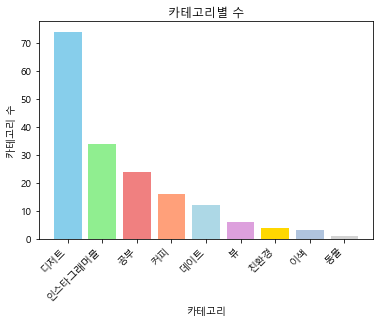

In [3]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트 경로로 변경
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 주어진 데이터
categories = ['디저트', '인스타그래머블', '공부', '커피', '데이트', '뷰', '친환경', '이색', '동물']
category_count = [74, 34, 24, 16, 12, 6, 4, 3, 1]

# 각 카테고리별 색상 지정
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightblue', 'plum', 'gold', 'lightsteelblue', 'lightgray']

# 막대그래프 그리기
plt.bar(categories, category_count, color=colors)

# 그래프 제목 및 축 레이블 추가
plt.title('카테고리별 수')
plt.xlabel('카테고리')
plt.ylabel('카테고리 수')

plt.xticks(rotation=45, ha='right')

# 그래프 표시
plt.show()


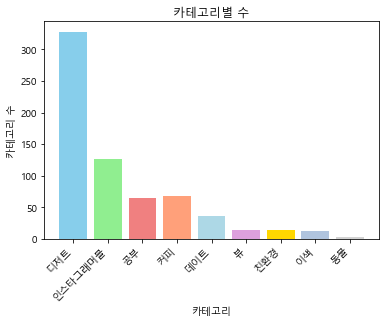

In [6]:
import matplotlib.pyplot as plt

# 데이터셋
categories1 = ['디저트', '인스타그래머블', '공부', '커피', '데이트', '뷰', '친환경', '이색', '동물']
category_count1 = [74, 34, 24, 16, 12, 6, 4, 3, 1]

categories2 = ['디저트', '인스타그래머블', '공부', '커피', '이색', '데이트', '뷰', '친환경', '동물']
category_count2 = [102, 48, 27, 24, 8, 7, 7, 6, 2]

categories3 = ['디저트', '인스타그래머블', '커피', '데이트', '공부', '친환경', '이색', '뷰']
category_count3 = [152, 44, 28, 18, 14, 4, 2, 1]

# 각 데이터셋을 하나로 합치기
merged_data = {}

for category, count in zip(categories1, category_count1):
    merged_data[category] = merged_data.get(category, 0) + count

for category, count in zip(categories2, category_count2):
    merged_data[category] = merged_data.get(category, 0) + count

for category, count in zip(categories3, category_count3):
    merged_data[category] = merged_data.get(category, 0) + count

# 그래프 그리기
categories = list(merged_data.keys())
category_count = list(merged_data.values())

# plt.bar(categories, category_count)
# plt.xlabel('카테고리')
# plt.ylabel('빈도')
# plt.title('카테고리별 빈도 합계')
# plt.show()


colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightblue', 'plum', 'gold', 'lightsteelblue', 'lightgray']

# 막대그래프 그리기
plt.bar(categories, category_count, color=colors)

# 그래프 제목 및 축 레이블 추가
plt.title('카테고리별 수')
plt.xlabel('카테고리')
plt.ylabel('카테고리 수')

plt.xticks(rotation=45, ha='right')

# 그래프 표시
plt.show()
